# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


['thompson',
 'mackay',
 'saint george',
 'rafai',
 'cape town',
 'manta',
 'ancud',
 'busselton',
 'pontianak',
 'dikson',
 'faanui',
 'rikitea',
 'jamestown',
 'kapaa',
 'ushuaia',
 'georgetown',
 'victoria',
 'castro',
 'vao',
 'zlobin',
 'tasiilaq',
 'atuona',
 'mar del plata',
 'puerto ayora',
 'kroya',
 'new norfolk',
 'kenai',
 'changji',
 'east london',
 'turukhansk',
 'road town',
 'barentsburg',
 'abu kamal',
 'kashi',
 'hobart',
 'saint-philippe',
 'sitka',
 'lebu',
 'den helder',
 'barrow',
 'yellowknife',
 'chokurdakh',
 'mataura',
 'ximei',
 'belushya guba',
 'ponta do sol',
 'nenjiang',
 'rosetown',
 'hasaki',
 'burica',
 'nikolskoye',
 'leningradskiy',
 'clifton springs',
 'san patricio',
 'cicevac',
 'belyy yar',
 'torbay',
 'kavieng',
 'galveston',
 'souillac',
 'tuktoyaktuk',
 'ribeira grande',
 'montrose',
 'wanning',
 'taolanaro',
 'geraldton',
 'sentyabrskiy',
 'vallenar',
 'biltine',
 'raudeberg',
 'solnechnyy',
 'arraial do cabo',
 'cayenne',
 'la grande',
 'sim

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
testcity= "tokyo"
urlBase = "https://api.openweathermap.org/data/2.5/weather?q="
urlappid = "&appid="
urlUnits = "&units=imperial"

In [15]:
latList = []
lonList = []
maxTempList = []
humList = []
cloudcovList = []
windList = []
countryList = []
datetimeList = []
cityIndex = 0
cityExceptList = []
cityExceptIndList = []

for city in cities:
    # Create try/except to compensate for errors
    try:
        print(f'Searching for city at index {cityIndex}, "{city}"')
        fullRequestUrl = f'{urlBase}{city}{urlappid}{weather_api_key}{urlUnits}'
        jsonObj = requests.get(fullRequestUrl).json()
        #Pull data from json response into lists
        latList.append(jsonObj["coord"]["lat"])
        lonList.append(jsonObj["coord"]["lon"])
        maxTempList.append(jsonObj["main"]["temp_max"])
        humList.append(jsonObj["main"]["humidity"])
        cloudcovList.append(jsonObj["clouds"]["all"])
        windList.append(jsonObj["wind"]["speed"])
        countryList.append(jsonObj["sys"]["country"])
        datetimeList.append(jsonObj["timezone"])
    except:
        print(f'        ...city not found. Recording and resuming.')
        cityExceptList.append(city)
        cityExceptIndList.append(cityIndex)

    cityIndex += 1
    time.sleep(1)
print(f'Requests complete!')

Searching for city at index 0, "thompson"
Searching for city at index 1, "mackay"
Searching for city at index 2, "saint george"
Searching for city at index 3, "rafai"
Searching for city at index 4, "cape town"
Searching for city at index 5, "manta"
Searching for city at index 6, "ancud"
Searching for city at index 7, "busselton"
Searching for city at index 8, "pontianak"
Searching for city at index 9, "dikson"
Searching for city at index 10, "faanui"
Searching for city at index 11, "rikitea"
Searching for city at index 12, "jamestown"
Searching for city at index 13, "kapaa"
Searching for city at index 14, "ushuaia"
Searching for city at index 15, "georgetown"
Searching for city at index 16, "victoria"
Searching for city at index 17, "castro"
Searching for city at index 18, "vao"
Searching for city at index 19, "zlobin"
Searching for city at index 20, "tasiilaq"
Searching for city at index 21, "atuona"
Searching for city at index 22, "mar del plata"
Searching for city at index 23, "puer

Searching for city at index 174, "pevek"
Searching for city at index 175, "careiro da varzea"
Searching for city at index 176, "provideniya"
Searching for city at index 177, "vanimo"
Searching for city at index 178, "cidreira"
Searching for city at index 179, "airai"
Searching for city at index 180, "pangnirtung"
Searching for city at index 181, "arlit"
Searching for city at index 182, "sabak"
Searching for city at index 183, "rio grande"
Searching for city at index 184, "mezen"
Searching for city at index 185, "kahului"
Searching for city at index 186, "bow island"
Searching for city at index 187, "birin"
Searching for city at index 188, "ranau"
Searching for city at index 189, "tome-acu"
        ...city not found. Recording and resuming.
Searching for city at index 190, "nhulunbuy"
Searching for city at index 191, "santa maria"
Searching for city at index 192, "moscavide"
Searching for city at index 193, "iracoubo"
Searching for city at index 194, "keuruu"
Searching for city at index

Searching for city at index 337, "snezhnogorsk"
Searching for city at index 338, "vestmanna"
Searching for city at index 339, "port macquarie"
Searching for city at index 340, "san quintin"
Searching for city at index 341, "soyo"
Searching for city at index 342, "inderborskiy"
        ...city not found. Recording and resuming.
Searching for city at index 343, "ambon"
Searching for city at index 344, "pakxan"
Searching for city at index 345, "tanjong sepat"
        ...city not found. Recording and resuming.
Searching for city at index 346, "necochea"
Searching for city at index 347, "amot"
Searching for city at index 348, "nanortalik"
Searching for city at index 349, "naryan-mar"
Searching for city at index 350, "taoudenni"
Searching for city at index 351, "flagstaff"
Searching for city at index 352, "krasnoselkup"
Searching for city at index 353, "werda"
Searching for city at index 354, "saint-pierre"
Searching for city at index 355, "mossendjo"
Searching for city at index 356, "ust-ka

Searching for city at index 503, "dingle"
Searching for city at index 504, "ust-maya"
Searching for city at index 505, "jamsa"
Searching for city at index 506, "margate"
Searching for city at index 507, "sarahan"
Searching for city at index 508, "anadyr"
Searching for city at index 509, "isangel"
Searching for city at index 510, "kungurtug"
Searching for city at index 511, "calatayud"
Searching for city at index 512, "itoman"
Searching for city at index 513, "dongsheng"
Searching for city at index 514, "touros"
Searching for city at index 515, "tenenkou"
Searching for city at index 516, "arcachon"
Searching for city at index 517, "marsa matruh"
Searching for city at index 518, "groningen"
Searching for city at index 519, "luau"
Searching for city at index 520, "honiara"
Searching for city at index 521, "kayerkan"
Searching for city at index 522, "nagaur"
Searching for city at index 523, "rockport"
Searching for city at index 524, "conde"
Searching for city at index 525, "ayan"
Searchin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#title capitalize all cities for formatting
cleanCityList = []
for cityerror in cityExceptList:
    cities.remove(cityerror)
    
cities





#remove items not found

ValueError: list.remove(x): x not in list

In [19]:
cityTitleList = []
for city in cities:
    cityTitleList.append(city.title())



['Thompson',
 'Mackay',
 'Saint George',
 'Rafai',
 'Cape Town',
 'Manta',
 'Ancud',
 'Busselton',
 'Pontianak',
 'Dikson',
 'Faanui',
 'Rikitea',
 'Jamestown',
 'Kapaa',
 'Ushuaia',
 'Georgetown',
 'Victoria',
 'Castro',
 'Vao',
 'Zlobin',
 'Tasiilaq',
 'Atuona',
 'Mar Del Plata',
 'Puerto Ayora',
 'Kroya',
 'New Norfolk',
 'Kenai',
 'Changji',
 'East London',
 'Turukhansk',
 'Road Town',
 'Abu Kamal',
 'Kashi',
 'Hobart',
 'Saint-Philippe',
 'Sitka',
 'Lebu',
 'Den Helder',
 'Barrow',
 'Yellowknife',
 'Chokurdakh',
 'Mataura',
 'Ximei',
 'Ponta Do Sol',
 'Nenjiang',
 'Rosetown',
 'Hasaki',
 'Nikolskoye',
 'Leningradskiy',
 'Clifton Springs',
 'San Patricio',
 'Cicevac',
 'Belyy Yar',
 'Torbay',
 'Kavieng',
 'Galveston',
 'Souillac',
 'Tuktoyaktuk',
 'Ribeira Grande',
 'Montrose',
 'Wanning',
 'Geraldton',
 'Vallenar',
 'Biltine',
 'Raudeberg',
 'Solnechnyy',
 'Arraial Do Cabo',
 'Cayenne',
 'La Grande',
 'Simbahan',
 'Priargunsk',
 'Dumas',
 'San Cristobal',
 'Avarua',
 'Pisco',
 'Pu

In [20]:

citiesdict = {
    "City Name":cityTitleList,
    "City Latitude":latList,
    "City Longitude":lonList,
    "Max Temperature":maxTempList,
    "Humidity":humList,
    "Cloud Coverage":cloudcovList,
    "Wind Speed":windList,
    "City Country":countryList,
    "City Datetime":datetimeList
}
citiesdf = pd.DataFrame(citiesdict)



citiesdf

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


In [21]:


citiesdf.to_csv("citiesdfOutput.csv", index=True, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
citiescsvdf = pd.read_csv("citiesdfOutput.csv", encoding = "UTF-8", index_col = 0)
citiescsvdf

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


In [58]:
#  Get the indices of cities that have humidity over 100%.
humidList = []

for index, row in citiescsvdf.iterrows():
    if row["Humidity"] > 100:
        humidList.append(index)
print(f'Any cities removed due to humidity?: ', end = "", flush = True)
if len(humidList) == 0:
    print(f'No')
elif len(humidList) > 0:
    print(f'Yes')


Any cities removed due to humidity?: No


In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citiescsvdf.drop(labels = humidList, inplace = False)
clean_city_data

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

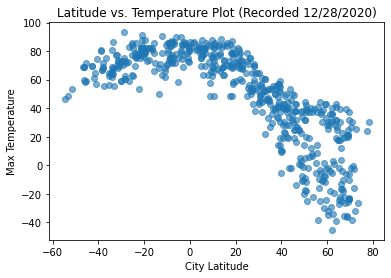

This graph compares a city's max temperature against 
its latitudinal location on the globe.


In [89]:

x_values = clean_city_data["City Latitude"].tolist()
y_values = clean_city_data["Max Temperature"].tolist()

plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature Plot (Recorded 12/28/2020)")
plt.show()
print(f'This graph compares a city\'s max temperature against \nits latitudinal location on the globe.')



## Latitude vs. Humidity Plot

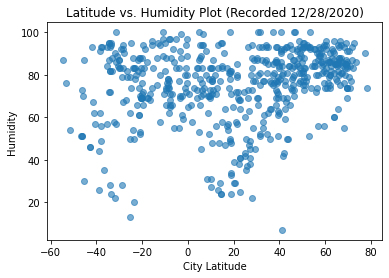

This graph compares a city's max temperature against 
its latitudinal location on the globe.


In [90]:
x_values = clean_city_data["City Latitude"].tolist()
y_values = clean_city_data["Humidity"].tolist()

plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot (Recorded 12/28/2020)")
plt.show()
print(f'This graph compares a city\'s humidity against \nits latitudinal location on the globe.')

## Latitude vs. Cloudiness Plot

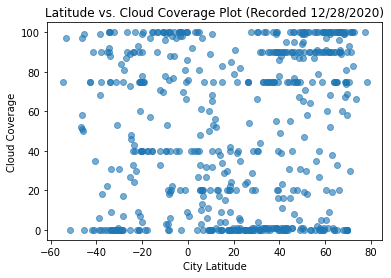

This graph compares a city's cloud coverage against 
its latitudinal location on the globe.


In [91]:
x_values = clean_city_data["City Latitude"].tolist()
y_values = clean_city_data["Cloud Coverage"].tolist()

plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs. Cloud Coverage Plot (Recorded 12/28/2020)")
plt.show()
print(f'This graph compares a city\'s cloud coverage against \nits latitudinal location on the globe.')

## Latitude vs. Wind Speed Plot

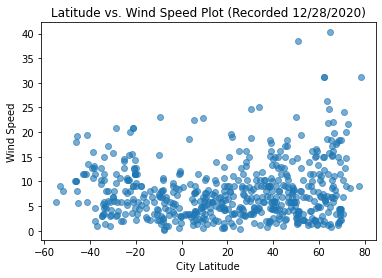

This graph compares a city's wind speed against 
its latitudinal location on the globe.


In [93]:
x_values = clean_city_data["City Latitude"].tolist()
y_values = clean_city_data["Wind Speed"].tolist()

plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot (Recorded 12/28/2020)")
plt.show()
print(f'This graph compares a city\'s wind speed against \nits latitudinal location on the globe.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [103]:
x_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "City Latitude"].tolist()
y_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "Max Temperature"].tolist()


[8.6,
 39.99,
 69.89,
 -26.16,
 28.0,
 78.8,
 87.8,
 73.99,
 48.99,
 30.2,
 30.2,
 -2.2,
 -25.26,
 78.8,
 45.28,
 19.4,
 44.6,
 39.99,
 -0.4,
 3.2,
 -37.98,
 73.4,
 60.8,
 -7.49,
 -2.2,
 53.6,
 28.4,
 -10.17,
 69.8,
 53.6,
 -22.0,
 24.8,
 64.99,
 -5.8,
 57.22,
 33.01,
 77.81,
 68.76,
 39.99,
 -11.58,
 75.2,
 19.4,
 82.51,
 -17.23,
 35.6,
 63.54,
 48.0,
 33.8,
 35.01,
 -16.01,
 73.4,
 39.2,
 46.0,
 67.95,
 82.29,
 32.0,
 33.21,
 37.4,
 30.2,
 43.02,
 39.2,
 32.0,
 28.4,
 -32.13,
 52.09,
 28.4,
 -23.8,
 5.0,
 37.0,
 24.22,
 85.08,
 57.99,
 53.6,
 67.73,
 22.23,
 37.99,
 70.66,
 60.8,
 34.0,
 26.6,
 37.99,
 19.6,
 19.4,
 -19.89,
 82.17,
 43.0,
 56.89,
 70.38,
 -35.55,
 78.8,
 -24.61,
 -29.06,
 64.99,
 56.12,
 -2.45,
 70.0,
 2.75,
 -13.59,
 78.8,
 46.99,
 -22.83,
 24.8,
 12.2,
 58.39,
 84.2,
 3.87,
 82.4,
 14.0,
 54.5,
 82.4,
 51.8,
 77.43,
 30.99,
 41.0,
 57.81,
 30.2,
 65.7,
 63.03,
 22.84,
 48.2,
 86.23,
 37.6,
 42.8,
 -25.19,
 -19.52,
 53.6,
 -38.96,
 52.0,
 82.4,
 26.6,
 -5.51,
 1.4,


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression